In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option("max_columns", 80)

In [3]:
df = pd.read_csv('data/interim_data/cdc_data_cleaned.csv')

---

In [4]:
color_scheme = 'Reds'
beg_year = 2005
end_year = 2015

---

In [5]:
df['record_condition_1'].unique()

array(['O268', 'O881', 'O065', 'O998', 'O903', 'O16', 'O364', 'O961',
       'O266', 'O879', 'O249', 'O994', 'O150', 'O960', 'O993', 'O159',
       'O149', 'O720', 'O721', 'O223', 'O038', 'O441', 'O759', 'O754',
       'O969', 'O95', 'O970', 'O009', 'O711', 'O101', 'O432', 'O85',
       'O882', 'O908', 'O001', 'O622', 'O995', 'O142', 'O039', 'O13',
       'O109', 'O988', 'O100', 'O996', 'O25', 'O980', 'O987', 'O243',
       'O031', 'O468', 'O992', 'O241', 'O429', 'O904', 'O469', 'O152',
       'O991', 'O021', 'O411', 'O036', 'O909', 'O059', 'O971', 'O459',
       'O990', 'O035', 'O864', 'O730', 'O722', 'O235', 'O291', 'O056',
       'O11', 'O997', 'O263', 'O102', 'O234', 'O073', 'O748', 'O714',
       'O300', 'O069', 'O731', 'O020', 'O037', 'O751', 'O048', 'O269',
       'O898', 'O60', 'O880', 'O068', 'O460', 'O141', 'O103', 'O229',
       'O723', 'O230', 'O713', 'O078', 'O209', 'O200', 'O066', 'O40',
       'O058', 'O868', 'O029', 'O690', 'O985', 'O679', 'O873', 'O981',
       'O240',

In [6]:
df.head(20)

,resident_status,education_level,month_of_death,age,place_of_death_patient_status,marital_status,day_of_week_of_death,year,manner_of_death,was_autopsy_done,place_of_injury_for_icd_w00_y34_except_y06_and_y07_,icd_code_10th_revision,358_causes_of_death,113_causes_of_death,130_causes_of_infant_death,39_cause_recode,number_of_entity_axis_conditions,entity_condition_1,entity_condition_2,entity_condition_3,number_of_record_axis_conditions,record_condition_1,record_condition_2,record_condition_3,race,race_recode_3,race_recode_5,hispanic_origin,hispanic_originrace_recode
0,RESIDENTS,Not Available,February,37,"Hospital, Clinic or Medical Center",Married,Tuesday,2015,Natural,No,Not Available,"Exhaustion and fatigue, Peripheral neuritis, o...",All other direct obstetric causes,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",4,11O268,21O995,31O268,2,O268,O903,Not Available,Black,Black,Black,Non – Hispanic,Non - Hispanic black
1,RESIDENTS,Not Available,January,56,"Hospital, Clinic or Medical Center",Widowed,Tuesday,2015,Natural,No,Not Available,"Exhaustion and fatigue, Peripheral neuritis, o...",All other direct obstetric causes,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",3,11O268,21O971,31O971,2,O268,O971,Not Available,Black,Black,Black,Non – Hispanic,Non - Hispanic black
2,RESIDENTS,Not Available,March,31,Other,Married,Tuesday,2015,Natural,No,Not Available,O881,Obstetric embolism,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",2,11O993,21O881,Not Available,1,O881,Not Available,Not Available,White,White,White,Non – Hispanic,Non - Hispanic white
3,INTRASTATE NONRESIDENTS,Not Available,April,24,"Hospital, Clinic or Medical Center",Divorced,Thursday,2015,Not Available,Unknown,Not Available,O065,Other and unspecified pregnancy with abortive ...,Pregnancy with abortive outcome,Not Available,"Pregnancy, childbirth and the puerperium",2,11O080,21O069,Not Available,1,O065,Not Available,Not Available,White,White,White,Non – Hispanic,Non - Hispanic white
4,INSTRASTATE NONRESIDENTS,Not Available,July,28,"Hospital, Clinic or Medical Center","Never married, Single",Saturday,2015,Natural,No,Not Available,Combination of conditions classifiable to O99....,Indirect obstetric deaths,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",2,11O994,21O998,Not Available,2,O998,O994,Not Available,Black,Black,Black,Non – Hispanic,Non - Hispanic black
5,RESIDENTS,Not Available,August,43,"Hospital, Clinic or Medical Center","Never married, Single",Friday,2015,Natural,No,Not Available,"Exhaustion and fatigue, Peripheral neuritis, o...",All other direct obstetric causes,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",3,11O988,61O268,62O149,2,O268,O149,Not Available,Black,Black,Black,Non – Hispanic,Non - Hispanic black
6,INTRASTATE NONRESIDENTS,Not Available,November,26,"Hospital, Clinic or Medical Center",Married,Wednesday,2015,Natural,No,Not Available,Supervision of pregnancy with history of infer...,Other complications predominately related to t...,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",5,11O993,21O268,31O993,2,O903,O268,Not Available,White,White,White,Non – Hispanic,Non - Hispanic white
7,RESIDENTS,Not Available,October,38,"Hospital, Clinic or Medical Center","Never married, Single",Saturday,2015,Could not determine,Yes,Not Available,Unspecified maternal hypertension,Eclampsia and pre-eclampsia,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",4,11O268,21O992,31O998,2,O16,O268,Not Available,Black,Black,Black,Non – Hispanic,Non - Hispanic black
8,RESIDENTS,Not Available,December,27,"Hospital, Clinic or Medical Center","Never married, Single"

In [7]:
df['race'].unique()

array(['Black', 'White', 'American Indian (includes Aleuts and Eskimos)',
       'Chinese', 'Filipino', 'Asian Indian',
       'Other Asian or Pacific Islander in areas reporting codes 18-58',
       'Combined other Asian or Pacific Islander, includes codes 18-68',
       'Japanese', 'Vietnamese', 'Korean',
       'Hawaiian (includes Part-Hawaiian)', 'Guamanian', 'Samoan'],
      dtype=object)

In [8]:
df['race_recode_3'].unique()

array(['Black', 'White', 'Races other than White or Black'], dtype=object)

In [9]:
df['race_recode_5'].unique()

array(['Black', 'White', 'American Indian', 'Asian or Pacific Islander'],
      dtype=object)

In [10]:
df['hispanic_origin'].unique()

array(['Non – Hispanic', 'Mexican', 'South American', 'Central American',
       'Puerto Rican', 'Unknown', 'Central and South American',
       'Other Hispanic', 'Latin American', 'Cuban', 'Dominican',
       'Spaniard'], dtype=object)

In [11]:
df['hispanic_originrace_recode'].unique()

array(['Non - Hispanic black', 'Non - Hispanic white', 'Mexican',
       'Non - Hispanic other races', 'Central or South American',
       'Puerto Rican', 'Hispanic origin unknown',
       'Other or unknown Hispanic', 'Cuban'], dtype=object)

In [12]:
df['manner_of_death'].unique()

array(['Natural', 'Not Available', 'Could not determine',
       'Pending investigation', 'Accident', 'Homicide', 'Suicide'],
      dtype=object)

In [13]:
df.shape

(10239, 29)

In [14]:
df[df['hispanic_origin'] == 'Non – Hispanic'].count()

resident_status                                        8508
education_level                                        8508
month_of_death                                         8508
age                                                    8508
place_of_death_patient_status                          8508
marital_status                                         8508
day_of_week_of_death                                   8508
year                                                   8508
manner_of_death                                        8508
was_autopsy_done                                       8508
place_of_injury_for_icd_w00_y34_except_y06_and_y07_    8508
icd_code_10th_revision                                 8508
358_causes_of_death                                    8508
113_causes_of_death                                    8508
130_causes_of_infant_death                             8508
39_cause_recode                                        8508
number_of_entity_axis_conditions        

---

# Reusable DFs

In [15]:
df_hispanic = df[df["hispanic_origin"] != "Non – Hispanic"]

In [16]:
df_non_hispanic = df[df["hispanic_origin"] == "Non – Hispanic"]

In [17]:
# add ethnicity column
df_hispanic['ethnicity'] = 'Hispanic'
df_non_hispanic['ethnicity'] = df_non_hispanic['race_recode_3']

df = pd.concat([df_hispanic, df_non_hispanic], axis=0, join='inner')
df["ethnicity"].replace({"Races other than White or Black": "Other"}, inplace=True)

<ipython-input-17-f8bcb57189fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hispanic['ethnicity'] = 'Hispanic'
<ipython-input-17-f8bcb57189fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_hispanic['ethnicity'] = df_non_hispanic['race_recode_3']


In [18]:
df_eclampsia = df[df['358_causes_of_death'] == 'Eclampsia and pre-eclampsia']

In [19]:
df_single = df[df['marital_status'] == 'Never married, Single']

In [20]:
df_deaths_hosp_clin_med_center = df[df['place_of_death_patient_status'] == 'Hospital, Clinic or Medical Center']

---

In [21]:
df

,resident_status,education_level,month_of_death,age,place_of_death_patient_status,marital_status,day_of_week_of_death,year,manner_of_death,was_autopsy_done,place_of_injury_for_icd_w00_y34_except_y06_and_y07_,icd_code_10th_revision,358_causes_of_death,113_causes_of_death,130_causes_of_infant_death,39_cause_recode,number_of_entity_axis_conditions,entity_condition_1,entity_condition_2,entity_condition_3,number_of_record_axis_conditions,record_condition_1,record_condition_2,record_condition_3,race,race_recode_3,race_recode_5,hispanic_origin,hispanic_originrace_recode,ethnicity
25,RESIDENTS,high school graduate or GED completed,January,49,"Hospital, Clinic or Medical Center",Divorced,Tuesday,2015,Natural,No,Not Available,O266,All other direct obstetric causes,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",9,11O268,21O988,22O992,2,O266,O268,Not Available,White,White,White,Mexican,Mexican,Hispanic
27,RESIDENTS,high school graduate or GED completed,January,40,"Hospital, Clinic or Medical Center",Married,Sunday,2015,Natural,No,Not Available,O266,All other direct obstetric causes,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",6,11O995,21O995,31O266,2,O266,O268,Not Available,White,White,White,Mexican,Mexican,Hispanic
30,RESIDENTS,Unknown,April,35,"Hospital, Clinic or Medical Center",Married,Friday,2015,Natural,Yes,Not Available,O720,Hemorrhage of pregnancy and childbirth and pla...,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",3,11O994,21O720,22O991,1,O720,Not Available,Not Available,White,White,White,Mexican,Mexican,Hispanic
32,RESIDENTS,Bachelor’s degree,April,41,"Hospital, Clinic or Medical Center",Married,Wednesday,2015,Natural,No,Not Available,O721,Hemorrhage of pregnancy and childbirth and pla...,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",3,11O721,12O991,21O95,1,O721,Not Available,Not Available,White,White,White,Mexican,Mexican,Hispanic
36,INTRASTATE NONRESIDENTS,high school graduate or GED completed,June,28,"Hospital, Clinic or Medical Center",Married,Sunday,2015,Natural,No,Not Available,O038,Spontaneous abortion,Pregnancy with abortive outcome,Not Available,"Pregnancy, childbirth and the puerperium",8,11O996,12O998,13O995,1,O038,Not Available,Not Available,White,White,White,Mexican,Mexican,Hispanic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10234,RESIDENTS,high school graduate or GED completed,November,25,"Hospital, Clinic or Medical Center",Married,Wednesday,2005,Natural,Yes,Not Available,O429,All other direct obstetric causes,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",7,11O85,12O411,13O992,3,O411,O429,O85,Black,Black,Black,Non – Hispanic,Non - Hispanic black,Black
10235,RESIDENTS,Master’s degree,November,31,"Hospital, Clinic or Medical Center",Married,Monday,2005,Natural,No,Not Available,"Exhaustion and fatigue, Peripheral neuritis, o...",All other direct obstetric causes,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",2,11O268,21R99,Not Available,2,O268,R99,Not Available,White,White,White,Non – Hispanic,Non - Hispanic white,White
10236,RESIDENTS,Bachelor’s degree,December,40,"Hospital, Clinic or Medical Center",Married,Saturday,2005,Natural,Yes,Not Available,Combination of conditions classifiable to O99....,Indirect obstetric deaths,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",2,11O998,12O994,Not Available,2,O994,O998,Not Available,White,White,White,Non – Hispanic,Non - Hispanic white,White
10237,RESIDENTS,high school graduate or GED completed,December,29,"Hospital, Clinic or Medical Center",Divorced,Wednesday,2

In [22]:
df.shape

(10239, 30)

3417 rows in dataset => 3417 deaths
1108 black women deaths
2113 white women deaths
196 other races deaths

In [23]:
column1 = 'ethnicity'
column2 = 'place_of_death_patient_status'

grouped_by_ethnicity_and_death_place = df.groupby([column1, column2]).size()
grouped_by_ethnicity_and_death_place

ethnicity  place_of_death_patient_status     
Black      Decedent’s home                        359
           Hospice facility                        46
           Hospital, Clinic or Medical Center    2753
           Nursing home/long term care             34
           Other                                   77
           Place of death unknown                  45
Hispanic   Decedent’s home                        182
           Hospice facility                        23
           Hospital, Clinic or Medical Center    1465
           Nursing home/long term care             17
           Other                                   38
           Place of death unknown                   6
Other      Decedent’s home                         68
           Hospice facility                         4
           Hospital, Clinic or Medical Center     496
           Nursing home/long term care             11
           Other                                    8
           Place of death unknown   

# How are hispanics represented among different races?

In [24]:
def group_by_race(df):
    return df.groupby(df['race_recode_3']).size()

In [25]:
group_by_race(df_hispanic)

race_recode_3
Black                                39
Races other than White or Black      18
White                              1674
dtype: int64

In [26]:
group_by_race(df_non_hispanic)

race_recode_3
Black                              3314
Races other than White or Black     589
White                              4605
dtype: int64

# What does marital status look like proportionate to race/ethnicity?

In [27]:
x=df.groupby(["ethnicity"]) ["marital_status"].value_counts().head

In [28]:
print (x)

<bound method NDFrame.head of ethnicity  marital_status        
Black      Never married, Single     2028
           Married                    959
           Divorced                   231
           Marital Status unknown      62
           Widowed                     34
Hispanic   Married                    875
           Never married, Single      709
           Divorced                   115
           Marital Status unknown      18
           Widowed                     14
Other      Married                    400
           Never married, Single      146
           Divorced                    34
           Widowed                      5
           Marital Status unknown       4
White      Married                   2535
           Never married, Single     1365
           Divorced                   592
           Widowed                     84
           Marital Status unknown      29
Name: marital_status, dtype: int64>


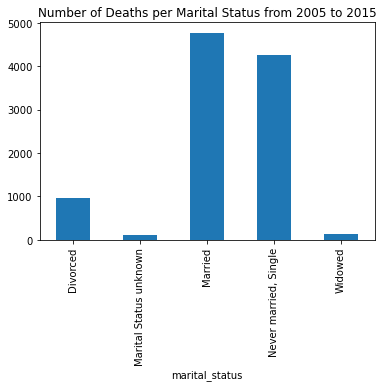

In [29]:
df.groupby(df['marital_status']).size().plot.bar(
    title=f'Number of Deaths per Marital Status from {beg_year} to {end_year}'
)

In [30]:
# Divide by total count
def create_marital_status_heatmap(df, column, normalization):
    event_count_table = pd.crosstab(
        index=df['marital_status'],
        columns=df[column],
        normalize=normalization
    )
    
    hmap = sns.heatmap(event_count_table, cmap=color_scheme, linewidths=1.5, annot=True)
    hmap.set_title(
        f'Deaths per Marital Status per {column} from {beg_year} to {end_year}'
    )
    
    return hmap

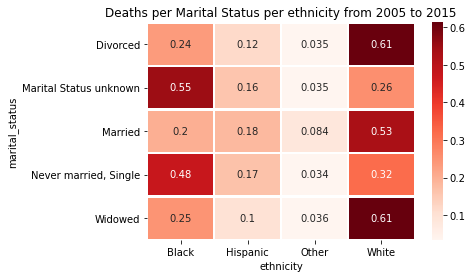

In [31]:
create_marital_status_heatmap(df, 'ethnicity', 'index')

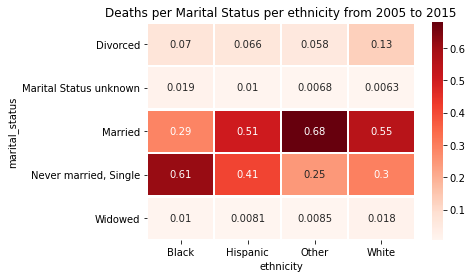

In [32]:
create_marital_status_heatmap(df, 'ethnicity', 'columns')

# How does the total deaths look like?

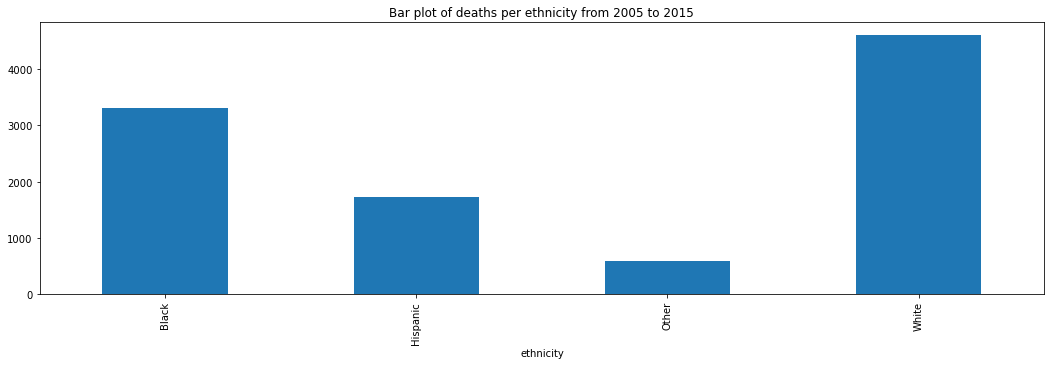

In [33]:
df.groupby(df['ethnicity']).size().plot.bar(
    title=f'Bar plot of deaths per ethnicity from {beg_year} to {end_year}',
    figsize=(18,5)
)

In [34]:
total_deaths = df.shape[0]
total_deaths

10239

In [35]:
df.groupby(df['ethnicity']).size()/total_deaths*100

ethnicity
Black       32.366442
Hispanic    16.905948
Other        5.752515
White       44.975095
dtype: float64

# How does the number of deaths change as the years go by?

In [36]:
total_deaths = df.shape[0]
total_deaths

10239

In [37]:
deaths_by_year = df.groupby(['year']).size()
deaths_by_year

year
2005     767
2006     767
2007     772
2008     798
2009     960
2010     829
2011     936
2012     993
2013    1142
2014    1131
2015    1144
dtype: int64

In [38]:
df_deaths_by_year = deaths_by_year.to_frame().reset_index().rename(columns={0:'total_count'})
df_deaths_by_year

,year,total_count
0,2005,767
1,2006,767
2,2007,772
3,2008,798
4,2009,960
5,2010,829
6,2011,936
7,2012,993
8,2013,1142
9,2014,1131


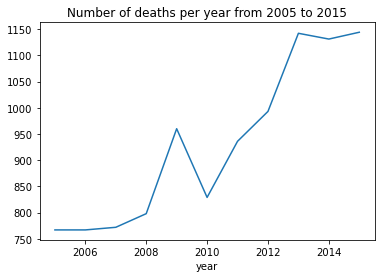

In [39]:
deaths_by_year.plot.line(
    title=f'Number of deaths per year from {beg_year} to {end_year}'
)

**There is a growing trend in the number of maternal deaths**

In [40]:
df_grouped_by_ethnicity_and_year = df.groupby(['ethnicity', 'year']).size()
df_grouped_by_ethnicity_and_year = df_grouped_by_ethnicity_and_year.reset_index()
df_grouped_by_ethnicity_and_year = df_grouped_by_ethnicity_and_year.rename(columns={0:'count'})
df_grouped_by_ethnicity_and_year

,ethnicity,year,count
0,Black,2005,265
1,Black,2006,256
2,Black,2007,248
3,Black,2008,248
4,Black,2009,305
5,Black,2010,262
6,Black,2011,301
7,Black,2012,333
8,Black,2013,362
9,Black,2014,361


In [41]:
def build_sns_lineplot_per_year(df, hue):
    ax = sns.lineplot(
        data=df,
        x='year',
        y="count",
        hue=hue,
    )
    ax.set_xlabel('Year')
    ax.set_title(
        f'Number of deaths per {hue} per year from {beg_year} to {end_year}'
    )

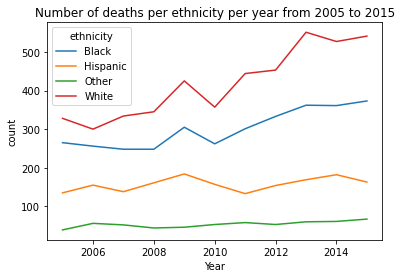

In [42]:
build_sns_lineplot_per_year(df_grouped_by_ethnicity_and_year, 'ethnicity')

**It seems that the growing trend in the total number of maternal deaths is true for the different ethnic groups looked at.**

In [43]:
df_grouped_by_ethnicity_and_year['%'] = df_grouped_by_ethnicity_and_year.apply(
    lambda x:
    int(x['count']) / int(df_deaths_by_year[df_deaths_by_year['year'] == x['year']]['total_count'])*100,
    axis = 1
)
df_grouped_by_ethnicity_and_year

,ethnicity,year,count,%
0,Black,2005,265,34.550196
1,Black,2006,256,33.376793
2,Black,2007,248,32.124352
3,Black,2008,248,31.077694
4,Black,2009,305,31.770833
5,Black,2010,262,31.604343
6,Black,2011,301,32.158120
7,Black,2012,333,33.534743
8,Black,2013,362,31.698774
9,Black,2014,361,31.918656


Text(0.5, 1.0, 'Deaths per year per ethnicity as a % of total deaths')

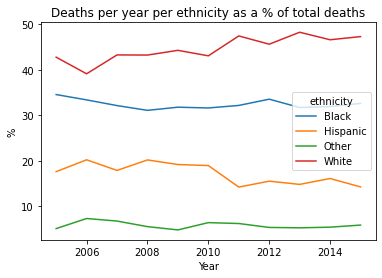

In [44]:
ax = sns.lineplot(
    data=df_grouped_by_ethnicity_and_year,
    x='year',
    y="%",
    hue='ethnicity',
)
ax.set_xlabel('Year')
ax.set_title(f'Deaths per year per ethnicity as a % of total deaths')

**When we look at the deaths per ethnicity as a percentage of total deaths per year, we can observe a growing trend for people with white and hispanic ethnicity and a decreasing trend for hispanics.  It looks like there is also a decreasing trend for black ethnicity, although that can't be said for sure.**

In [45]:
df_grouped_by_marital_status_and_year = df.groupby(['marital_status', 'year']).size()
df_grouped_by_marital_status_and_year = df_grouped_by_marital_status_and_year.reset_index()
df_grouped_by_marital_status_and_year = df_grouped_by_marital_status_and_year.rename(columns={0:'count'})

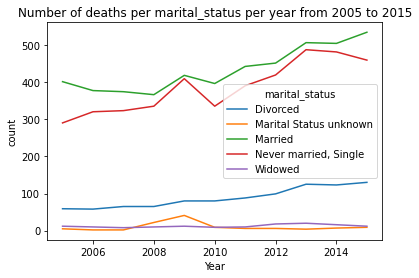

In [46]:
build_sns_lineplot_per_year(df_grouped_by_marital_status_and_year, 'marital_status')

In [47]:
df_grouped_by_marit_stat_eth_and_year = df.groupby(['marital_status', 'ethnicity', 'year']).size()
df_grouped_by_marit_stat_eth_and_year = df_grouped_by_marit_stat_eth_and_year.reset_index()
df_grouped_by_marit_stat_eth_and_year = df_grouped_by_marit_stat_eth_and_year.rename(columns={0:'count'})

In [48]:
df_grouped_by_marit_stat_eth_and_year['%'] = df_grouped_by_marit_stat_eth_and_year.apply(
    lambda x:
    int(x['count']) / int(df_deaths_by_year[df_deaths_by_year['year'] == x['year']]['total_count'])*100,
    axis = 1
)
df_grouped_by_marit_stat_eth_and_year[df_grouped_by_marit_stat_eth_and_year['ethnicity'] == 'Black'].head(40)

,marital_status,ethnicity,year,count,%
0,Divorced,Black,2005,17,2.216428
1,Divorced,Black,2006,23,2.998696
2,Divorced,Black,2007,13,1.683938
3,Divorced,Black,2008,17,2.130326
4,Divorced,Black,2009,13,1.354167
5,Divorced,Black,2010,18,2.171291
6,Divorced,Black,2011,18,1.923077
7,Divorced,Black,2012,23,2.316213
8,Divorced,Black,2013,30,2.626970
9,Divorced,Black,2014,22,1.945181


---

# Do different races/ethnicities die of the same causes proportionally?

In [49]:
def create_ethnicity_heatmap(df, column, normalization, annot = True):
    event_count_table = pd.crosstab(
        index=df['ethnicity'],
        columns=df[column],
        normalize=normalization
    )
    
    hmap = sns.heatmap(event_count_table, cmap=color_scheme, linewidths=1.5, annot=annot)
    hmap.set_title(f'Deaths per {column.replace("_", " ")} per ethnicity from {beg_year} to {end_year}')
    
    return hmap

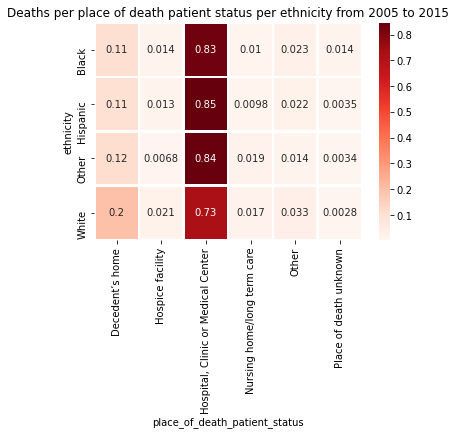

In [50]:
create_ethnicity_heatmap(df, 'place_of_death_patient_status', 'index')

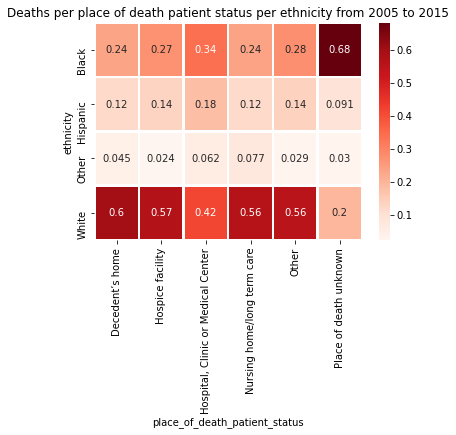

In [51]:
create_ethnicity_heatmap(df, 'place_of_death_patient_status', 'columns')

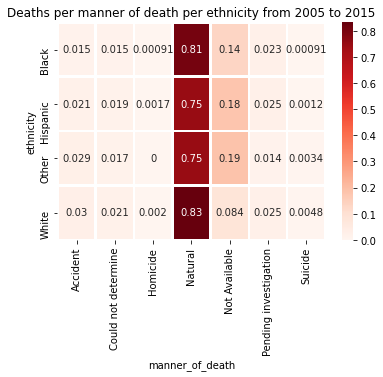

In [52]:
create_ethnicity_heatmap(df, 'manner_of_death', 'index')

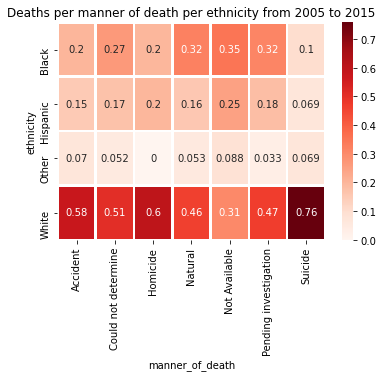

In [53]:
create_ethnicity_heatmap(df, 'manner_of_death', 'columns')

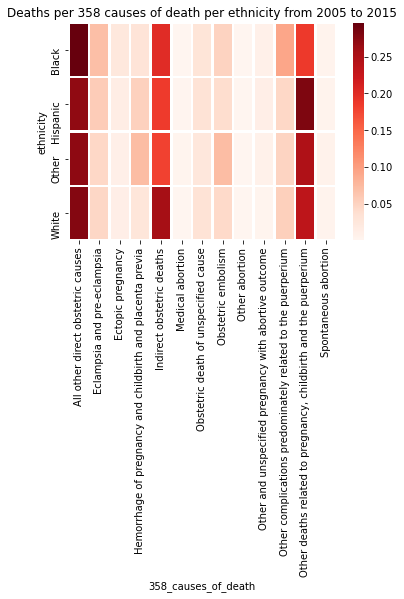

In [54]:
create_ethnicity_heatmap(df, '358_causes_of_death', 'index', False)

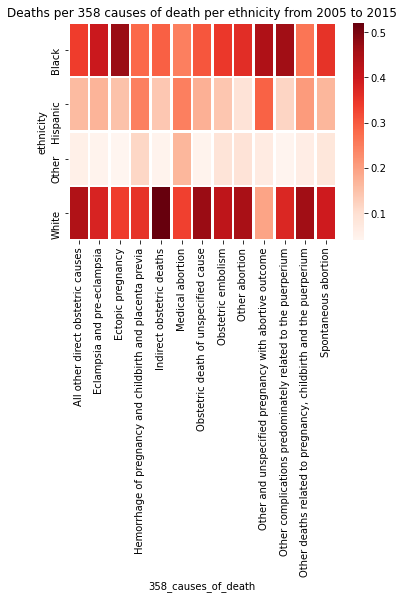

In [55]:
create_ethnicity_heatmap(df, '358_causes_of_death', 'columns', False)

In [56]:
def get_ct(df, var):
    ct_res = pd.crosstab(df['ethnicity'], df[var], margins=True)
    ct_res['Abortive Outcome (%)'] = round(ct_res['Pregnancy with abortive outcome']/ct_res['All']*100, 2)
    return ct_res.drop(columns='All')

In [57]:
get_ct(df, '113_causes_of_death')

113_causes_of_death,"Other complications of pregnancy, childbirth and the puerperium",Pregnancy with abortive outcome,Abortive Outcome (%)
ethnicity,,,
Black,3176,138,4.16
Hispanic,1672,59,3.41
Other,570,19,3.23
White,4504,101,2.19
All,9922,317,3.10


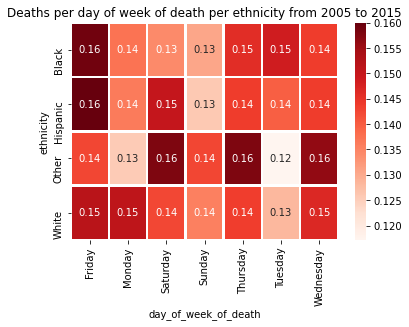

In [58]:
create_ethnicity_heatmap(df, 'day_of_week_of_death', 'index')

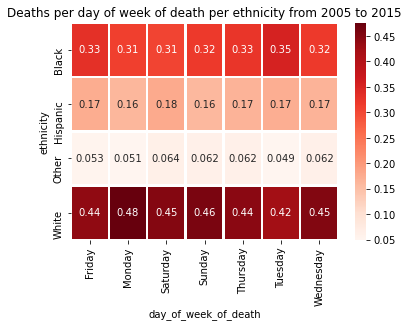

In [59]:
create_ethnicity_heatmap(df, 'day_of_week_of_death', 'columns')

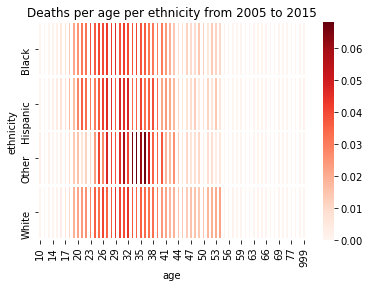

In [60]:
create_ethnicity_heatmap(df, 'age', 'index', False)

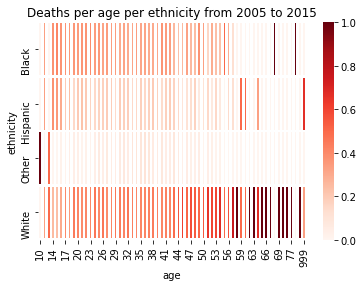

In [61]:
create_ethnicity_heatmap(df, 'age', 'columns', False)

**The main causes of death seem to be the same for each race analyzed.  It might be worth to investigate further why black women die more of eclampsia and pre-eclampsia.**

----

# Is the education level different for different ethnicities?

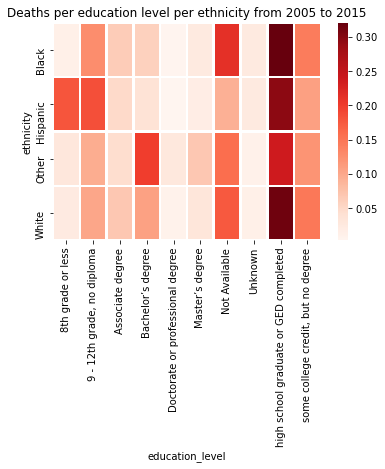

In [62]:
create_ethnicity_heatmap(df, 'education_level', 'index', False)

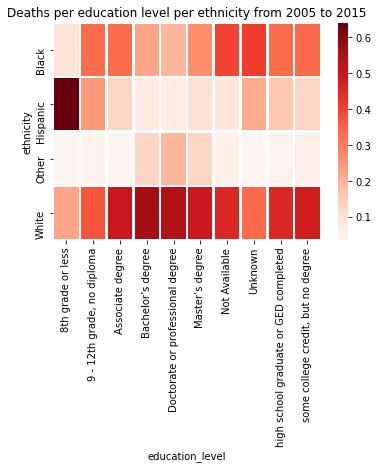

In [63]:
create_ethnicity_heatmap(df, 'education_level', 'columns', False)

---

# Is the percentage of missing data constant for different ethnicities?

In [64]:
def get_na_numbers_per_ethnicity(df, ethnicity, column_name):
    df_ethnicity = df[df["ethnicity"] == ethnicity]
    na_ethnicity = df_ethnicity[df[column_name] == 'Not Available']
    ethnicity_pct = len(na_ethnicity) / len(df_ethnicity)
    return ethnicity_pct

In [65]:
def compare_na_numbers_per_ethnicity(df, column_name):
    white = get_na_numbers_per_ethnicity(df, 'White', column_name)
    black = get_na_numbers_per_ethnicity(df, 'Black', column_name)
    hispanic = get_na_numbers_per_ethnicity(df, 'Hispanic', column_name)
    other = get_na_numbers_per_ethnicity(df, 'Other', column_name)

        
    print(f'The number of N/A records for the column {column_name} are {white} for white, {black} for black, {hispanic} for hispanic, {other} for other races')

In [66]:
compare_na_numbers_per_ethnicity(df, 'manner_of_death')

The number of N/A records for the column manner_of_death are 0.08425624321389794 for white, 0.1351840675920338 for black, 0.18197573656845753 for hispanic, 0.18845500848896435 for other races


<ipython-input-64-c46ae4644659>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  na_ethnicity = df_ethnicity[df[column_name] == 'Not Available']


In [67]:
compare_na_numbers_per_ethnicity(df, 'icd_code_10th_revision')

The number of N/A records for the column icd_code_10th_revision are 0.0 for white, 0.0 for black, 0.0 for hispanic, 0.0 for other races


<ipython-input-64-c46ae4644659>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  na_ethnicity = df_ethnicity[df[column_name] == 'Not Available']


In [68]:
compare_na_numbers_per_ethnicity(df, 'education_level')

<ipython-input-64-c46ae4644659>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  na_ethnicity = df_ethnicity[df[column_name] == 'Not Available']


The number of N/A records for the column education_level are 0.1761129207383279 for white, 0.21273385636692818 for black, 0.09358752166377816 for hispanic, 0.15789473684210525 for other races


-----

# What's the most common icd causes of death among each ethnicity?

In [69]:
pd.set_option('display.max_colwidth', None)

In [70]:
def most_common_icd_10_code(df):
    icd_causes_of_death_by_ethnicity = df.groupby(["ethnicity", "icd_code_10th_revision"]).size().to_frame().reset_index()
    icd_causes_of_death_by_ethnicity = icd_causes_of_death_by_ethnicity.rename(columns={0:'count'})
    icd_causes_of_death_by_ethnicity = icd_causes_of_death_by_ethnicity.sort_values(['ethnicity', 'count'], ascending = (True, False))
    icd_causes_of_death_by_ethnicity = icd_causes_of_death_by_ethnicity.groupby('ethnicity').head(5)
    return icd_causes_of_death_by_ethnicity

In [71]:
df['icd_code_10th_revision'].unique()

array(['O266', 'O720', 'O721', 'O038',
       'Exhaustion and fatigue, Peripheral neuritis, or Renal disease',
       'Death from direct obstetric cause occurring more than 42 days but less than one year after delivery',
       'Death from indirect obstetric cause occurring more than 42 days but less than one year after delivery',
       'O754', 'O969', 'O001', 'O881', 'O95', 'O13',
       'Eclampsia in pregnancy',
       'Combination of conditions classifiable to O99.0-O99.7', 'O759',
       'Diseases of the circulatory system complicating pregnancy, childbirth and the puerperium',
       'O711', 'O469', 'O970', 'HELLP syndrome', 'O993', 'O100',
       'Supervision of pregnancy with history of infertility, third trimester',
       'O622', 'O009', 'O882', 'Eclampsia, unspecified as to time period',
       'Pre-eclampsia superimposed on chronic hypertension', 'O988',
       'O263', 'O996', 'O234', 'O300', 'O069', 'O731', 'O249', 'O035',
       'O432', 'O995', 'O987', 'Unspecified matern

In [72]:
df_most_common_icd_10 = most_common_icd_10_code(df)
df_most_common_icd_10

,ethnicity,icd_code_10th_revision,count
6,Black,"Exhaustion and fatigue, Peripheral neuritis, or Renal disease",501
0,Black,Combination of conditions classifiable to O99.0-O99.7,268
8,Black,Late maternal deaths,250
134,Black,"Supervision of pregnancy with history of infertility, third trimester",231
3,Black,"Diseases of the circulatory system complicating pregnancy, childbirth and the puerperium",228
145,Hispanic,Late maternal deaths,256
143,Hispanic,"Exhaustion and fatigue, Peripheral neuritis, or Renal disease",243
137,Hispanic,Combination of conditions classifiable to O99.0-O99.7,154
139,Hispanic,Death from indirect obstetric cause occurring more than 42 days but less than one year after delivery,105
140,Hispanic,"Diseases of the circulatory system complicating pregnancy, childbirth and the puerperium",104


In [73]:
df_most_common_icd_10_eclampsia = most_common_icd_10_code(df_eclampsia)
df_most_common_icd_10_eclampsia

,ethnicity,icd_code_10th_revision,count
8,Black,Unspecified maternal hypertension,64
9,Black,unspecified pre-eclampsia,62
1,Black,"Eclampsia, unspecified as to time period",54
5,Black,O141*,14
2,Black,HELLP syndrome,10
18,Hispanic,unspecified pre-eclampsia,26
11,Hispanic,"Eclampsia, unspecified as to time period",24
15,Hispanic,O141*,16
17,Hispanic,Unspecified maternal hypertension,12
10,Hispanic,Eclampsia in pregnancy,7


In [74]:
df_most_common_icd_10['% of total deaths'] = df_most_common_icd_10.apply(
    lambda x:
    int(x['count']) / int(total_deaths)*100,
    axis = 1
)
df_most_common_icd_10

,ethnicity,icd_code_10th_revision,count,% of total deaths
6,Black,"Exhaustion and fatigue, Peripheral neuritis, or Renal disease",501,4.893056
0,Black,Combination of conditions classifiable to O99.0-O99.7,268,2.617443
8,Black,Late maternal deaths,250,2.441645
134,Black,"Supervision of pregnancy with history of infertility, third trimester",231,2.256080
3,Black,"Diseases of the circulatory system complicating pregnancy, childbirth and the puerperium",228,2.226780
145,Hispanic,Late maternal deaths,256,2.500244
143,Hispanic,"Exhaustion and fatigue, Peripheral neuritis, or Renal disease",243,2.373279
137,Hispanic,Combination of conditions classifiable to O99.0-O99.7,154,1.504053
139,Hispanic,Death from indirect obstetric cause occurring more than 42 days but less than one year after delivery,105,1.025491
140,Hispanic,"Diseases of the circulatory system complicating pregnancy, childbirth and the puerperium",104,1.015724


In [75]:
df_most_common_icd_10_eclampsia['% of total deaths'] = df_most_common_icd_10_eclampsia.apply(
    lambda x:
    int(x['count']) / int(total_deaths)*100,
    axis = 1
)
df_most_common_icd_10_eclampsia

,ethnicity,icd_code_10th_revision,count,% of total deaths
8,Black,Unspecified maternal hypertension,64,0.625061
9,Black,unspecified pre-eclampsia,62,0.605528
1,Black,"Eclampsia, unspecified as to time period",54,0.527395
5,Black,O141*,14,0.136732
2,Black,HELLP syndrome,10,0.097666
18,Hispanic,unspecified pre-eclampsia,26,0.253931
11,Hispanic,"Eclampsia, unspecified as to time period",24,0.234398
15,Hispanic,O141*,16,0.156265
17,Hispanic,Unspecified maternal hypertension,12,0.117199
10,Hispanic,Eclampsia in pregnancy,7,0.068366


Looking at the most common icd 10 codes per ethnicity, we then decided to take a further look at the women with pre-elampsia and eclampsia, since we noticed in an earlier step that Black women seem to die more from it when compared to other races.
The number of deaths of Black Women in the top 3 categories is very high, considering that they represent a much smaller part of the population.
As pre-elampsia and eclampsia are known high risk factors, maybe some of those deaths could be prevented. 

Since we also noticed that black single women seem to die at a very high rate, we decided to investigate further the causes of their death, but 

In [76]:
df_most_common_icd_10_single = most_common_icd_10_code(df_single)
df_most_common_icd_10_single

,ethnicity,icd_code_10th_revision,count
6,Black,"Exhaustion and fatigue, Peripheral neuritis, or Renal disease",311
8,Black,Late maternal deaths,171
0,Black,Combination of conditions classifiable to O99.0-O99.7,156
115,Black,"Supervision of pregnancy with history of infertility, third trimester",154
3,Black,"Diseases of the circulatory system complicating pregnancy, childbirth and the puerperium",137
126,Hispanic,Late maternal deaths,106
124,Hispanic,"Exhaustion and fatigue, Peripheral neuritis, or Renal disease",100
118,Hispanic,Combination of conditions classifiable to O99.0-O99.7,60
121,Hispanic,"Diseases of the circulatory system complicating pregnancy, childbirth and the puerperium",43
120,Hispanic,Death from indirect obstetric cause occurring more than 42 days but less than one year after delivery,42


In [77]:
df_most_common_icd_10_single['% of total deaths'] = df_most_common_icd_10_single.apply(
    lambda x:
    int(x['count']) / int(total_deaths)*100,
    axis = 1
)
df_most_common_icd_10_single

,ethnicity,icd_code_10th_revision,count,% of total deaths
6,Black,"Exhaustion and fatigue, Peripheral neuritis, or Renal disease",311,3.037406
8,Black,Late maternal deaths,171,1.670085
0,Black,Combination of conditions classifiable to O99.0-O99.7,156,1.523586
115,Black,"Supervision of pregnancy with history of infertility, third trimester",154,1.504053
3,Black,"Diseases of the circulatory system complicating pregnancy, childbirth and the puerperium",137,1.338021
126,Hispanic,Late maternal deaths,106,1.035257
124,Hispanic,"Exhaustion and fatigue, Peripheral neuritis, or Renal disease",100,0.976658
118,Hispanic,Combination of conditions classifiable to O99.0-O99.7,60,0.585995
121,Hispanic,"Diseases of the circulatory system complicating pregnancy, childbirth and the puerperium",43,0.419963
120,Hispanic,Death from indirect obstetric cause occurring more than 42 days but less than one year after delivery,42,0.410196


---

In [78]:
df_grouped_by_ethnicity_and_age = df.groupby(['ethnicity', 'age']).size()
df_grouped_by_ethnicity_and_age = df_grouped_by_ethnicity_and_age.reset_index()
df_grouped_by_ethnicity_and_age = df_grouped_by_ethnicity_and_age.rename(columns={0:'count'})
df_grouped_by_ethnicity_and_age

,ethnicity,age,count
0,Black,12,1
1,Black,14,3
2,Black,15,7
3,Black,16,16
4,Black,17,26
...,...,...,...
192,White,70,1
193,White,75,1
194,White,77,1
195,White,94,1


/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Deaths per ethnicity per age from 2005 to 2015')

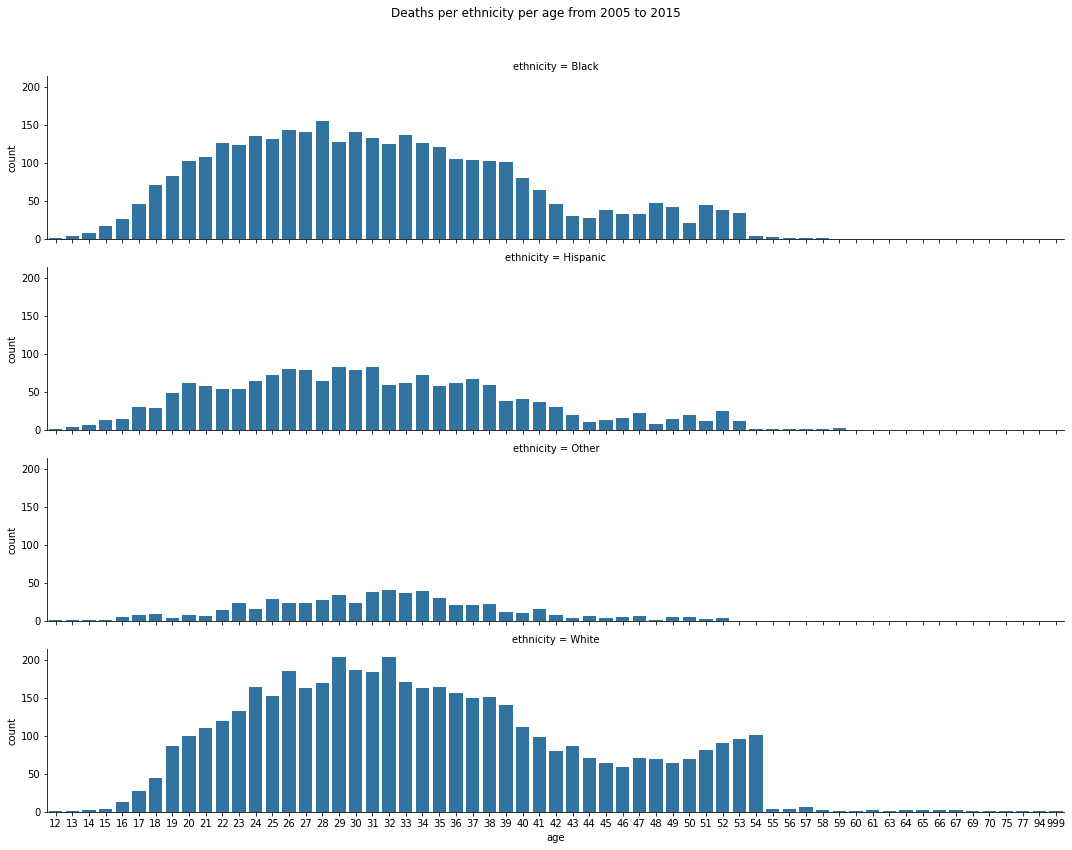

In [79]:
chart = sns.FacetGrid(
    df_grouped_by_ethnicity_and_age,
    col='ethnicity',
    margin_titles=True,
    col_wrap=1,
    aspect=5,
    row_order=df['ethnicity'].unique
)

# to actually plot
chart.map(sns.barplot, 'age', 'count')
chart.fig.subplots_adjust(top=0.9)
chart.fig.suptitle(
    f'Deaths per ethnicity per age from {beg_year} to {end_year}'
)

Text(0.5, 0.98, 'Deaths per age per ethnicity from 2005 to 2015')

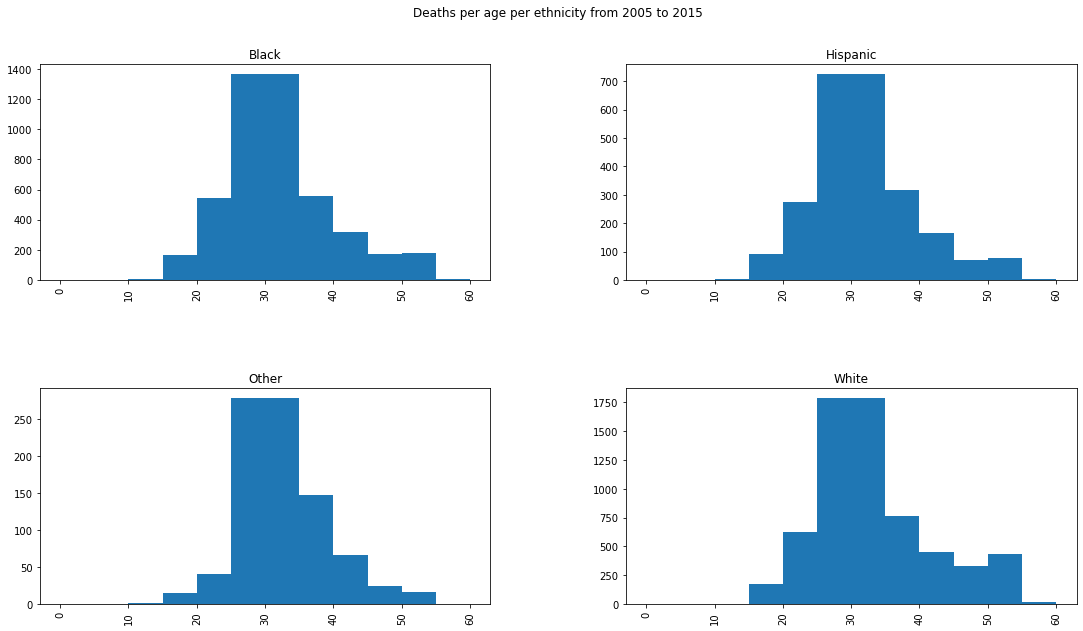

In [80]:
df.hist(by ='ethnicity',
       column ='age', bins=[0,5,10,15,20,25,35,40,45,50,55,60],
       figsize=(18,10)
       )
plt.suptitle(f'Deaths per age per ethnicity from {beg_year} to {end_year}')


Text(0.5, 1.0, 'Deaths per age from 2005 to 2015')

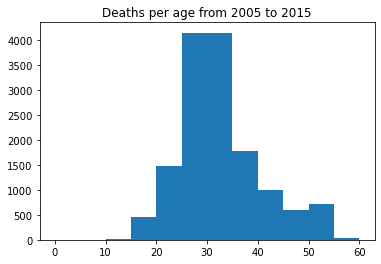

In [81]:
plt.hist(df['age'], bins=[0,5,10,15,20,25,35,40,45,50,55,60])
plt.title(f'Deaths per age from {beg_year} to {end_year}')

Text(0.5, 1.0, 'Deaths per ethnicity from 2005 to 2015')

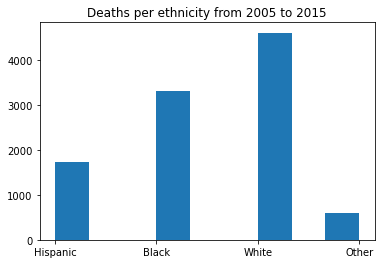

In [82]:
plt.hist(df['ethnicity'], bins=9)
plt.title(f'Deaths per ethnicity from {beg_year} to {end_year}')

In [83]:
df_grouped_by_ethnicity_and_manner_of_death = df.groupby(['ethnicity', 'manner_of_death']).size()
df_grouped_by_ethnicity_and_manner_of_death = df_grouped_by_ethnicity_and_manner_of_death.reset_index()
df_grouped_by_ethnicity_and_manner_of_death = df_grouped_by_ethnicity_and_manner_of_death.rename(columns={0:'count'})
df_grouped_by_ethnicity_and_manner_of_death

,ethnicity,manner_of_death,count
0,Black,Accident,49
1,Black,Could not determine,51
2,Black,Homicide,3
3,Black,Natural,2683
4,Black,Not Available,448
5,Black,Pending investigation,77
6,Black,Suicide,3
7,Hispanic,Accident,37
8,Hispanic,Could not determine,33
9,Hispanic,Homicide,3


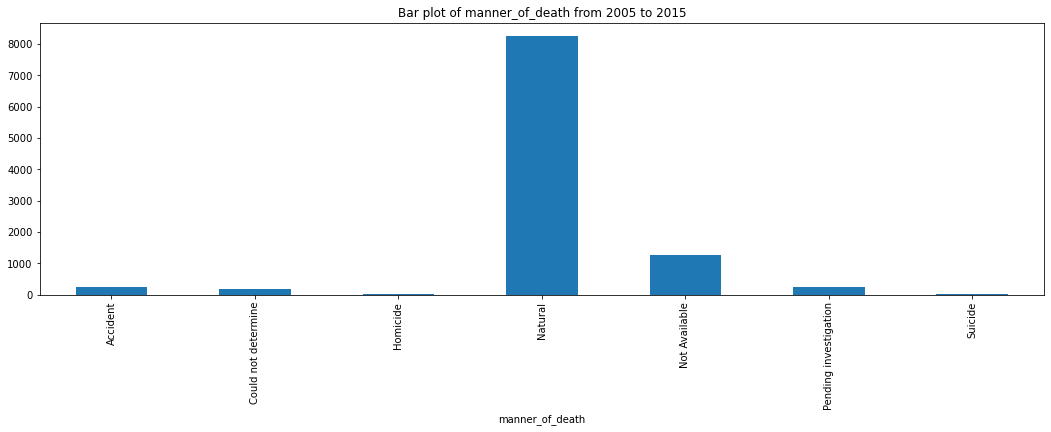

In [84]:
df.groupby(df['manner_of_death']).size().plot.bar(
    title=f'Bar plot of manner_of_death from {beg_year} to {end_year}',
    figsize=(18,5)
)

Text(0.5, 0.98, 'Deaths per manner of death per ethnicity from 2005 to 2015')

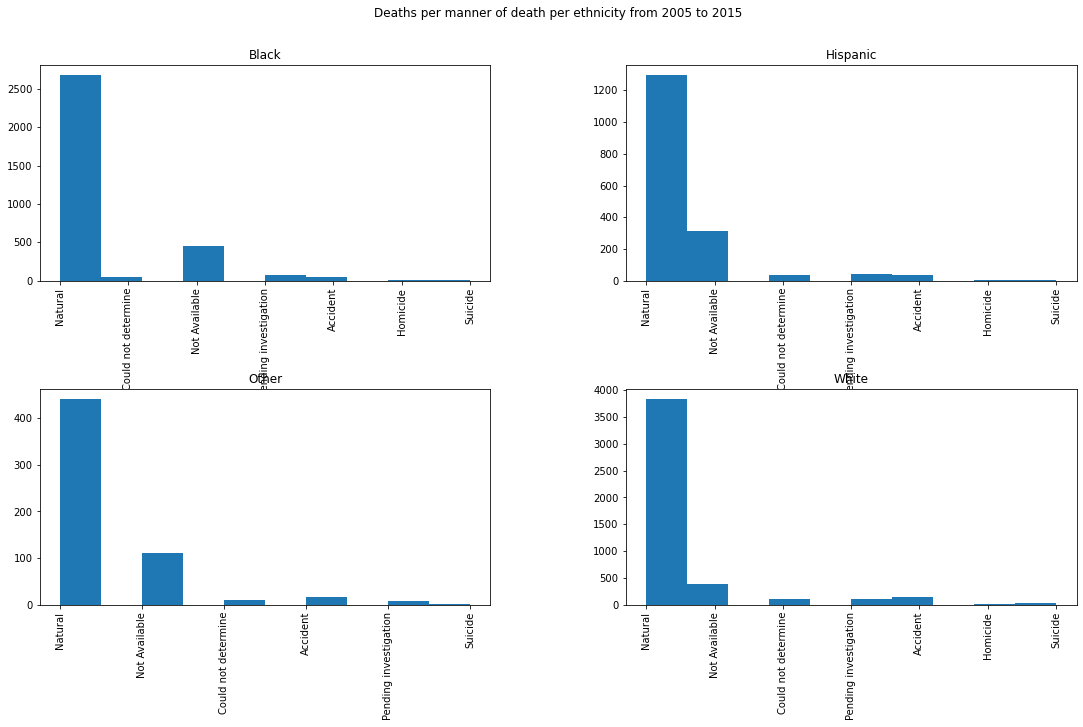

In [85]:
df.hist(by ='ethnicity',
       column ='manner_of_death',
       figsize=(18,10)
       )
plt.suptitle(f'Deaths per manner of death per ethnicity from {beg_year} to {end_year}')

Text(0.5, 0.98, 'Number of autopsies for maternal deaths per ethnicity from 2005 to 2015')

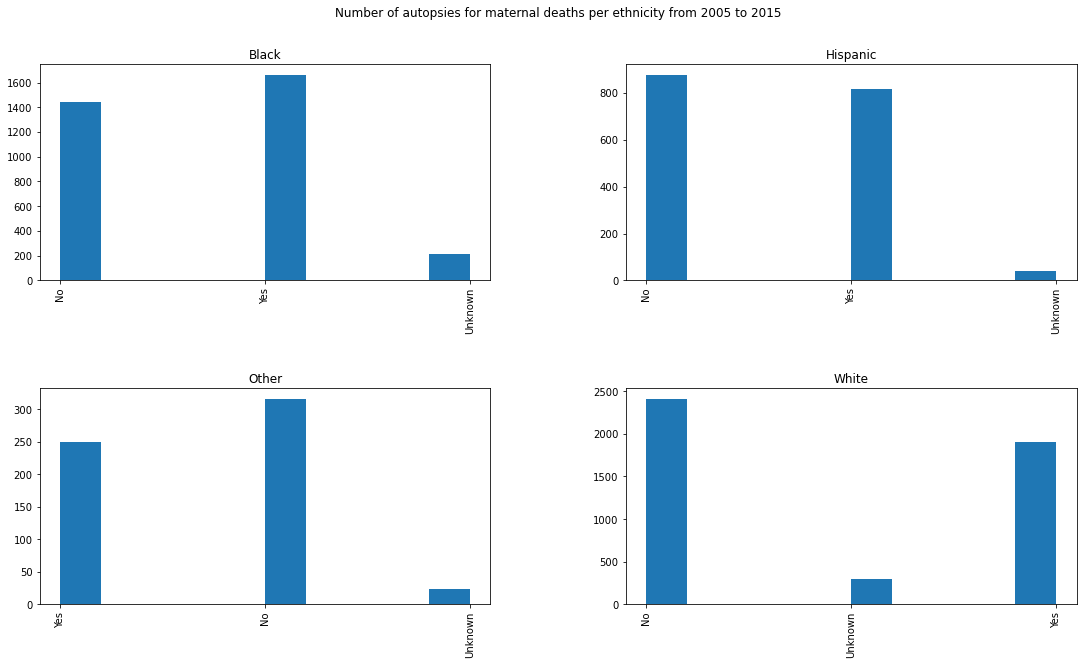

In [86]:
df.hist(by ='ethnicity',
       column ='was_autopsy_done',
       figsize=(18,10)
       )
plt.suptitle(f'Number of autopsies for maternal deaths per ethnicity from {beg_year} to {end_year}')

In [87]:
df.to_csv('data/interim_data/cdc_data_cleaned_with_ethnicities.csv', index=False)